<a href="https://colab.research.google.com/github/PujaTu126/Assessment/blob/main/MLN601ChakrobortyAnkhiAssessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the CRISP-DM Method for MLN 601 Machine Learning
#Assessment 3: Project







CRISP-DM stands for cross-industry process for data mining and represents a robust and proven framework available since 1996. While providing a structured approach to planning a data mining project is extremely useful for the documentation, building and deployment of ML projects. The model represents an ideal framework but tasks can be executed in a different sequence and if necessary repeated. The template is a cut down version for use in the completion of your assessment. Any code is shown as comments for example purposes and not necessiarily intended to be completely working. Your final assessment report should follow this template and include your code and narrative text.     


The CRISP steps are:

1. Gain an understanding of the business

2. Gain an understanding of the data

3. Prepare the data

4. Complete modeling

5. Evaluate

6. Deploy






# 1. Stage One - Determine Business Objectives and Assess the Situation

The first stage of the CRISP-DM process is to understand what I want to accomplish from a business perspective. For the bike sharing assessment, think about the requirement to predict the bike demand using the variety of data available including weather. Insert my understanding of the problem and what I am trying to achieve.

## Business Understanding

The business problem is to accurately predict the daily count of bike rentals (cnt) for Capital Bikeshare in Washington D.C. based on environmental, seasonal, and historical factors. This is framed as a regression task, where the goal is to forecast demand given inputs such as weather conditions, calendar features, and usage patterns.

*   **Business Objective:**
Develop a predictive model that estimates daily rental demand, enabling the company to:

   *  Optimize bike distribution across stations.

   * Improve resource allocation and staffing.

   * Support pricing and promotional strategies.

   * Enhance customer satisfaction by reducing shortages and excess idle bikes.

* **Success Criteria:**
The model will be considered successful if it achieves:

   * Low prediction error (low RMSE) and strong explanatory power (high R²) on unseen data.

   * Predictions that are reliable enough to inform day-to-day operational decisions.

   * Interpretability, using Explainable AI (e.g., feature importance, SHAP, partial dependence plots), so business managers understand which factors most influence bike demand.

By delivering accurate and interpretable forecasts, this project will provide actionable insights to improve service availability, reduce operational inefficiencies, and support long-term strategic planning for Capital Bikeshare.

## 1.1 Assess the Current Situation<a class="anchor"></a>

**Personnel:**

I, Ankhi Chakroborty, am pursuing with MSc in Cybersecurity Adv. from Torrens University, responsible for the full CRISP-DM cycle: business understanding, data preparation, modeling, evaluation, and reporting.

No additional team members are directly involved in this project.

**Data:**

The dataset used is the Capital Bikeshare daily dataset (day.csv), which includes daily counts of bike rentals in Washington D.C. along with calendar (season, month, weekday, holiday, working day) and weather (temperature, humidity, windspeed, weather situation) features.

  **Source:** **UCI Machine Learning Repository**(https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)


Data is well-structured in CSV format with no major missing values, making it suitable for predictive modeling.

**Computing Resources:**

  * **Cloud environment:** Microsoft Azure Notebook with 4 GB of available memory.

This resource is sufficient for exploratory data analysis, regression modeling, cross-validation, and ensembling.

**Software:**

   * Programming language: Python 3.6.

   * Development environment: Azure Notebook.

**Libraries planned for use:**

   * Pandas, NumPy → for data loading, cleaning, manipulation.

   * Matplotlib, Seaborn → for visualization.

   * Scikit-learn → for regression models, cross-validation, and evaluation.

   * XGBoost, LightGBM → for advanced ensemble modeling.

   * SHAP, sklearn.inspection → for Explainable AI (XAI).

# 2. Stage  Two - Data Understanding <a class="anchor"></a>
The dataset contains daily bike rental counts from Capital Bikeshare in Washington D.C. along with associated weather and seasonal information. Each record represents a single day between 2011 and 2012, and the target variable is cnt (the total number of bikes rented, including both casual and registered users).

**Key Features in the Dataset:**

* **Target variable**

    cnt: total number of daily bike rentals.

* **User breakdown**

    casual: rentals by unregistered (one-time) users.

    registered: rentals by registered subscribers.

* **Calendar features**

    dteday: date of observation.

    season: season (1 = winter, 2 = spring, 3 = summer, 4 = fall).

    yr: year indicator (0 = 2011, 1 = 2012).

    mnth: month (1–12).

    weekday: day of week (0–6).

    holiday: whether the day was a public holiday.

    workingday: whether the day was a working day.

* **Weather features**

    weathersit: general weather situation (e.g., clear, cloudy, light rain, heavy rain/snow).

    temp: normalized daily average temperature.

    atemp: normalized “feels-like” temperature.

    hum: normalized humidity.

    windspeed: normalized windspeed.

**Initial Observations:**

   * The dataset is clean and complete with no major missing or duplicate values.

   * **Seasonal patterns are evident:** Demand peaks in summer and fall and drops in winter.

   * **Calendar effects play a role:** weekends and working days show different rental behavior, while holidays generally reduce demand.

   * **Weather variables** strongly influence usage: higher temperatures increase rentals, while high humidity, rain, or snow decrease demand.

   * **Trend over time:** rentals increased from 2011 to 2012, reflecting growth in adoption of the service.

These findings confirm that both temporal factors (season, month, weekday) and environmental factors (temperature, weather condition, humidity, windspeed) are critical in explaining rental demand. This understanding guides the feature engineering and modeling steps, ensuring that the predictors selected are both meaningful to the business and relevant for accurate forecasting..

## 2.1 Initial Data Acquisition

List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems I encountered and any resolutions achieved.

**Description:**

The dataset used for this project is the Capital Bikeshare daily dataset (day.csv), which contains daily bike rental counts along with weather and seasonal information for Washington D.C. The dataset is publicly available from the **UCI Machine Learning Repository** (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)
 and is commonly used for predictive modeling exercises.

In this notebook, I loaded the dataset from the local working directory (/content/) using the Pandas library:

**Importance:**

Documenting data acquisition ensures reproducibility — anyone re-running this project can trace back exactly where the data came from and how it was imported. It also makes it easier to replicate or extend the work in the future.

  * **Possible Data Acquisition Methods:**

   *  Direct download from web sources (e.g., pd.read_csv(url) from UCI repository).

   *  Upload from local machine (e.g., via Google Colab’s file upload or Jupyter’s file explorer).

   *  Cloud storage integration (e.g., Google Drive, AWS S3, Azure Blob).

   *  APIs (though not applicable here, many business datasets can be pulled programmatically).

* **Problems Encountered and Resolutions:**

   *  **File not found error:** Initially, the file path had to be checked to ensure that day.csv was in the correct working directory (/content/). This was resolved by verifying the upload and using the absolute path.

   *  **Encoding issues:** No encoding problems were found since the dataset is clean and provided in standard CSV format.

   *  **Data completeness:** The dataset was intact with no missing values, so no corrective action was required.

In [36]:
# Import Libraries Required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import warnings
# Disable warnings
warnings.filterwarnings("ignore")


In [37]:
#Data source:
#Source Query location:
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df_day =  pd.read_csv('/content/day.csv', sep=',')
df_day.head().style.background_gradient(cmap="viridis")

In [38]:
# Target
TARGET_COL = "cnt"

# Categorical & numeric features
CATEGORICAL_COLS = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
NUMERIC_COLS     = ["temp", "atemp", "hum", "windspeed", "casual", "registered"]

## 2.2 Describe Data

Data description of the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements to solve the problem.

The dataset `day.csv` contains daily bike rental counts and associated information.

*   **Format:** CSV (Comma Separated Values)
*   **Quantity:** The dataset contains 731 records (rows) and 16 initial fields (columns). After feature engineering, the number of columns increased.
*   **Fields:** The dataset includes features such as:
    *   `instant`: record index
    *   `dteday`: date
    *   `season`: 1: winter, 2: spring, 3: summer, 4: fall
    *   `yr`: year (0: 2011, 1: 2012)
    *   `mnth`: month (1 to 12)
    *   `holiday`: whether day is holiday or not
    *   `weekday`: day of the week
    *   `workingday`: if day is neither weekend nor holiday
    *   `weathersit`:
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    *   `temp`: Normalized temperature in Celsius
    *   `atemp`: Normalized feeling temperature in Celsius
    *   `hum`: Normalized humidity
    *   `windspeed`: Normalized wind speed
    *   `casual`: count of casual users
    *   `registered`: count of registered users
    *   `cnt`: count of total rental bikes including both casual and registered (Target Variable)

After feature engineering, additional time-based and cyclical features were added, along with lag and rolling average features.

The data appears to be suitable for the problem of predicting daily bike rentals, containing relevant information about date, time, and weather conditions which are expected to influence demand.

In [39]:
#df.columns, df.shape, df.dtypes, df.describe(), df.info() and df.head(10) Use Pandas to explore and clean up your tabular data
#Data description for day.csv file
print("\nDataset information (day.csv):")
print("Rows: ",df_day.shape[0])
print("Columns:",df_day.shape[1])
display(df_day.head(10))
display(df_day.tail(10))
df_day.info()
print(f"Description of Data:\n{df_day.describe()}")


Dataset information (day.csv):
Rows:  731
Columns: 16


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
721      722  2012-12-22       1   1    12        0        6           0   
722      723  2012-12-23       1   1    12        0        0           0   
723      724  2012-12-24       1   1    12        0        1           1   
724      725  2012-12-25       1   1    12        1        2           0   
725      726  2012-12-26       1   1    12        0        3           1   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
721           1  0.265833  0.236113  0.441250   0.407346     205        1544   
722           1  0.245833  0.259471  0.515417   0.133083     408        1379   
723           2  0.231304  0.258900  0.791304   0.077230     174         746   
724           2  0.291304  0.294465  0.734783   0.168726     440         573   
725           3  0.243333  0.220333  0.823333   0.316546       9         432   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
721  1749  
722  1787  
723   920  
724  1013  
725   441  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Description of Data:
          instant      season          yr        mnth     holiday     we

## 2.3 Verify Data Quality

Examine the quality of the data:

-   Is the data complete (does it cover all that you require)?
-   Is it correct, or does the data contain errors ?
-   Are there missing values in the data? If so, where do they occur?

### 2.3.1. Outliers

**Description:**

*   This section focuses on identifying and understanding data quality issues.
*   In your notebook, you checked for missing values, duplicated rows, checked for non-negative values and consistency (`casual` + `registered` == `cnt`), examined value ranges and unique values for categorical features, and checked for missing dates in the time series.
*   Useing boxplots to visually identify potential outliers in numerical features and calculates the IQR to define outlier boundaries, though no outliers were explicitly removed in that code.

**Importance:**

*   Ensuring data quality is critical for the reliability of my analysis and models.
*   Identifying missing values, duplicates, and outliers helps in deciding on appropriate data cleaning and preprocessing strategies.

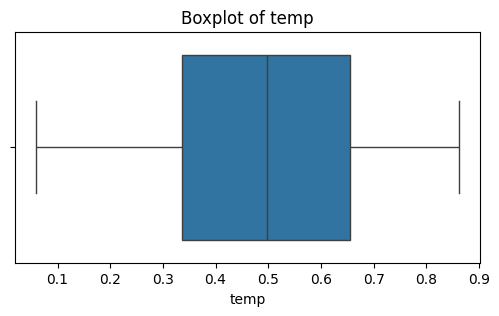

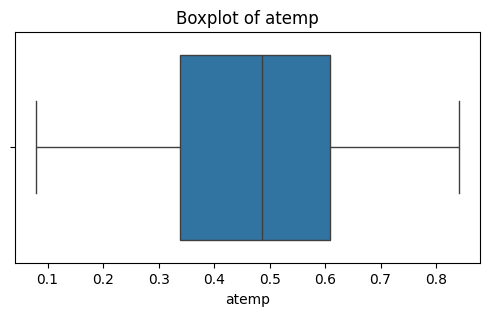

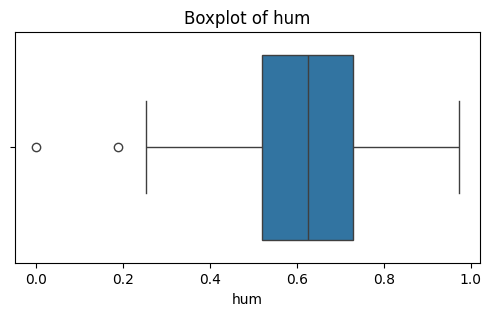

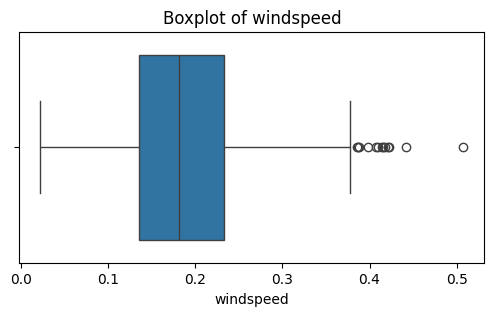

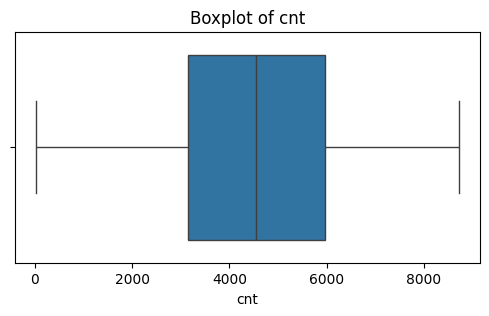

In [40]:
# Check for Outliers
# Day.csv
Q1 = df_day["cnt"].quantile(0.25)
Q3 = df_day["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_day[(df_day["cnt"] < lower_bound) | (df_day["cnt"] > upper_bound)]
outliers.head().style.background_gradient(cmap="viridis")

# Boxplots for numeric features
for col in ["temp", "atemp", "hum", "windspeed", "cnt"]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_day[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 2.3.2 Missing Values

Check for missing values in both dataframes.

In [41]:
# Total missing values in each column
missing_values = df_day.isna().sum()

print("Total missing values in each column:")
display(missing_values.to_frame(name="Total Missing Value").style.background_gradient("viridis"))

Total missing values in each column:


In [42]:
# Check duplicated data
print("Duplicated values (day.csv) :", df_day.duplicated().sum())

Duplicated values (day.csv) : 0


In [43]:
# Ensure datetime type
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [44]:
# Feature Engineering
# Time-based features
df_day["year"] = df_day["dteday"].dt.year
df_day["month"] = df_day["dteday"].dt.month
df_day["day_of_week"] = df_day["dteday"].dt.weekday   # 0=Monday, 6=Sunday
df_day["is_weekend"] = df_day["day_of_week"].isin([5, 6]).astype(int)

In [45]:
# Cyclical encoding for seasonality
df_day["month_sin"] = np.sin(2 * np.pi * df_day["month"] / 12)
df_day["month_cos"] = np.cos(2 * np.pi * df_day["month"] / 12)
df_day["dow_sin"] = np.sin(2 * np.pi * df_day["day_of_week"] / 7)
df_day["dow_cos"] = np.cos(2 * np.pi * df_day["day_of_week"] / 7)

In [46]:
# Lag features (use past values of target)
df_day = df_day.sort_values("dteday")  # ensure time order
df_day["lag_1"] = df_day["cnt"].shift(1)     # yesterday
df_day["lag_7"] = df_day["cnt"].shift(7)     # same day last week

## 2.4 Initial Data Exploration

During this stage, address data questions using querying, data visualization and reporting techniques. These may include:

-   **Distribution** of key attributes (for example, the target attribute of a prediction task)
-   **Relationships** between pairs or small numbers of attributes
-   Results of **simple aggregations**
-   **Properties** of significant sub-populations
-   **Simple** statistical analyses

These analyses may contribute to or refine the data description and quality aspects of your report, and feed into other data preparation steps needed for further analysis.

-   **Data exploration component of your report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. Include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

**Description:**

*   This section involves visualizing and analyzing the data to uncover patterns, relationships, and insights.
*   You generated descriptive statistics for numerical variables.
*   You visualized the distribution of the target variable (`cnt`) using a histogram.
*   You created scatter plots with regression lines to visualize the relationship between numerical features and the target variable.
*   You used bar plots to show the average bike rentals by categorical features.
*   You generated a correlation heatmap to visualize the pairwise correlations between numerical features and the target.
*   You created a pairplot to show distributions and pairwise relationships for numerical features and the target.

**Importance:**

*   Data exploration provides initial insights into the data and helps form hypotheses.
*   Visualizations make it easier to identify trends, patterns, and potential issues that might not be obvious from raw data or statistics.
*   Understanding relationships between features is crucial for feature selection and model building.

In [47]:
# Rolling averages
df_day["rolling_3"] = df_day["cnt"].shift(1).rolling(window=3).mean()
df_day["rolling_7"] = df_day["cnt"].shift(1).rolling(window=7).mean()

In [48]:
# Drop NA rows created by lag/rolling
df_day = df_day.dropna().reset_index(drop=True)

In [49]:
# Updated feature lists
CATEGORICAL_COLS = [
    "season", "yr", "holiday", "workingday", "weathersit", "is_weekend"
]
NUMERIC_COLS = [
    "temp", "atemp", "hum", "windspeed",
    "month_sin", "month_cos", "dow_sin", "dow_cos",
    "lag_1", "lag_7", "rolling_3", "rolling_7"
]

print("Final feature set:", CATEGORICAL_COLS + NUMERIC_COLS)
df_day.info()

Final feature set: ['season', 'yr', 'holiday', 'workingday', 'weathersit', 'is_weekend', 'temp', 'atemp', 'hum', 'windspeed', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos', 'lag_1', 'lag_7', 'rolling_3', 'rolling_7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      724 non-null    int64         
 1   dteday       724 non-null    datetime64[ns]
 2   season       724 non-null    int64         
 3   yr           724 non-null    int64         
 4   mnth         724 non-null    int64         
 5   holiday      724 non-null    int64         
 6   weekday      724 non-null    int64         
 7   workingday   724 non-null    int64         
 8   weathersit   724 non-null    int64         
 9   temp         724 non-null    float64       
 10  atemp        724 non-null    float64       
 11  hum          724 non-null    float6

### 2.4.1 Distributions  <a class="anchor"></a>

In [50]:
# Descriptive Statistics
day_desc_stat = (
    df_day.select_dtypes(include=["number"]).describe().T.style
    .background_gradient(cmap="viridis")
    .set_caption("Descriptive Statistics of Numeric Variables")
)
day_desc_stat

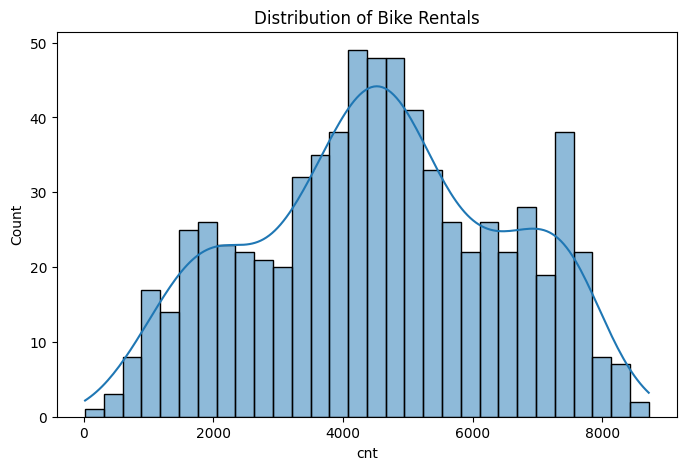

In [51]:
#Exploratory Data Analysis
plt.figure(figsize=(8,5))
sns.histplot(df_day[TARGET_COL], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

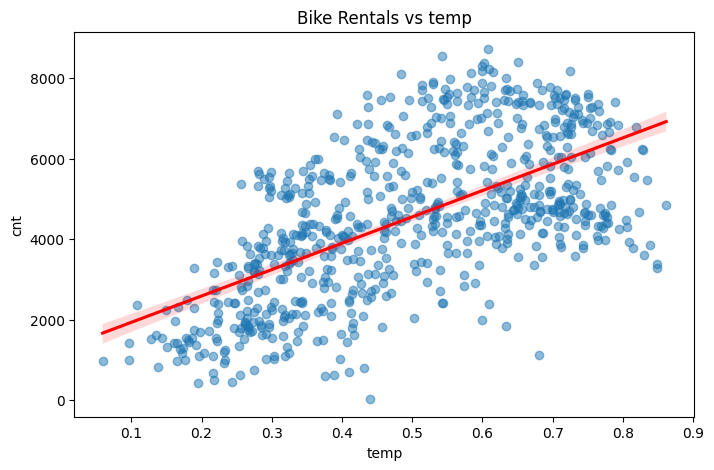

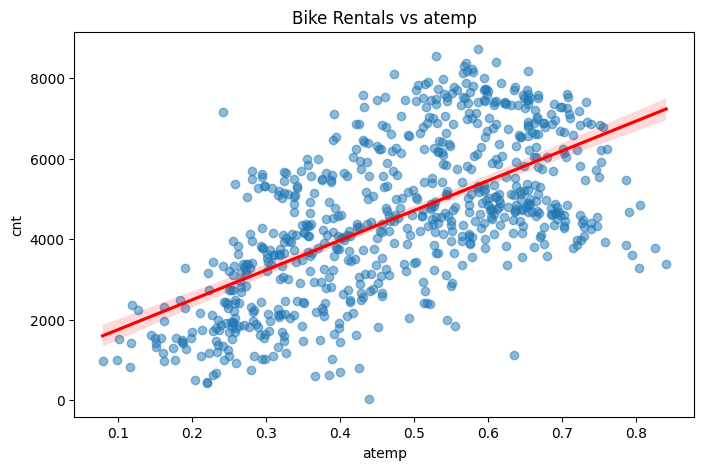

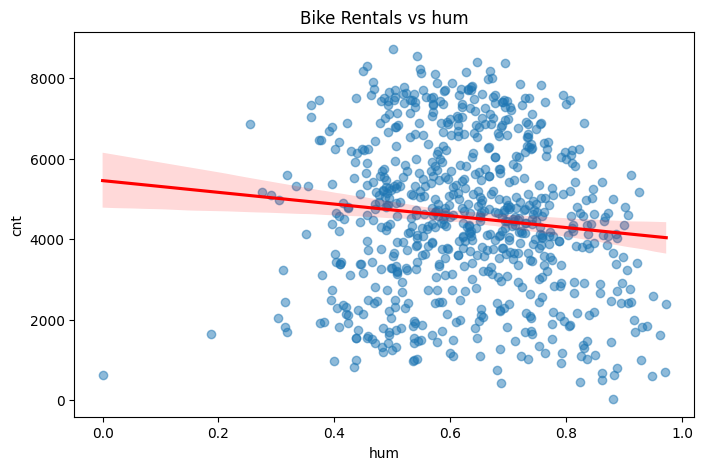

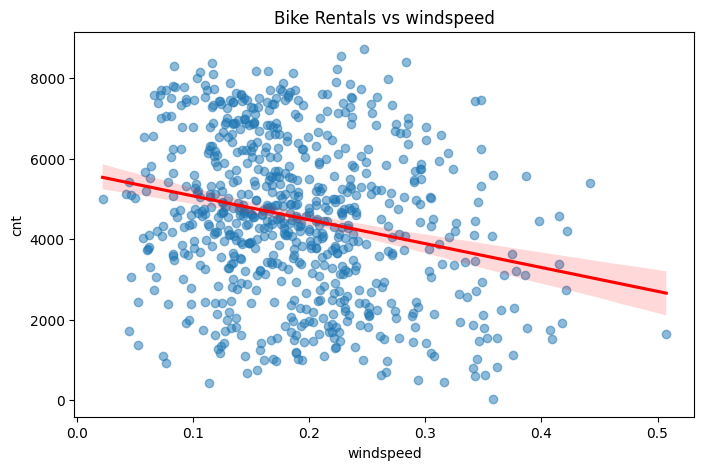

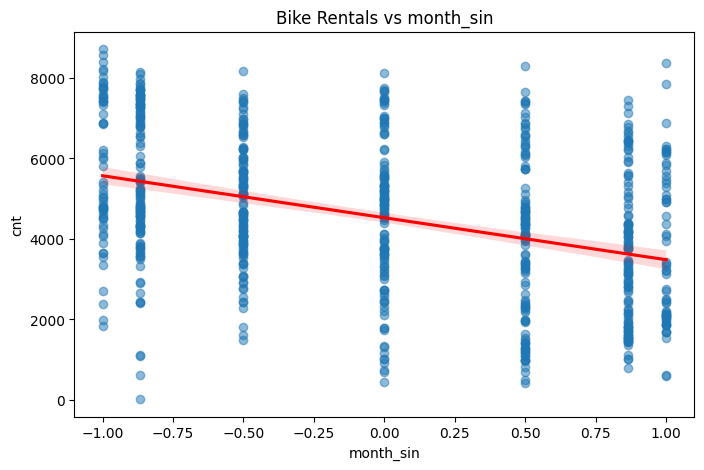

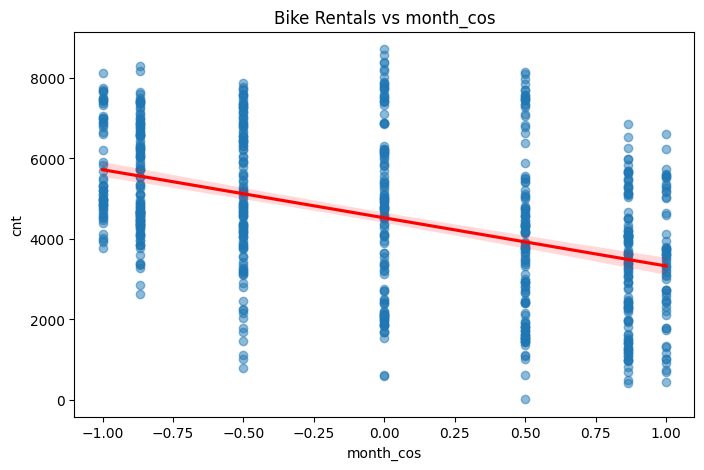

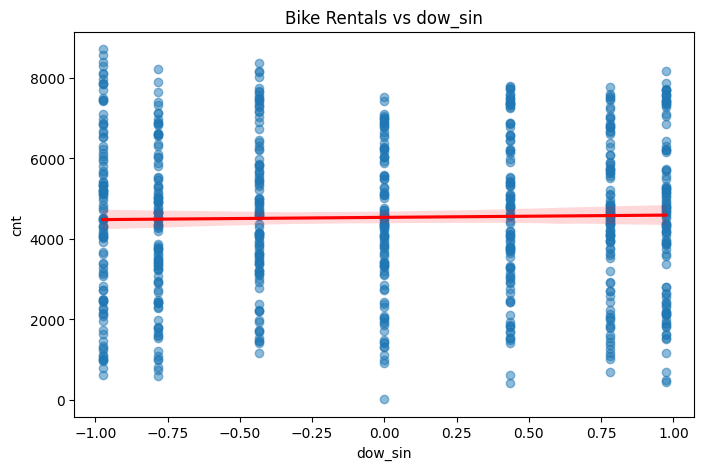

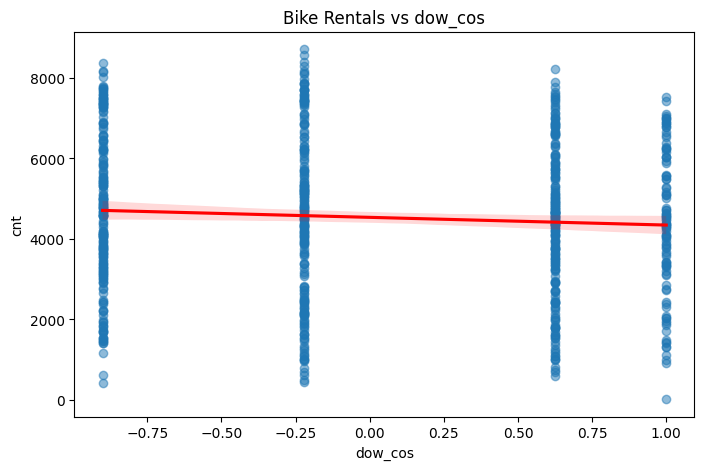

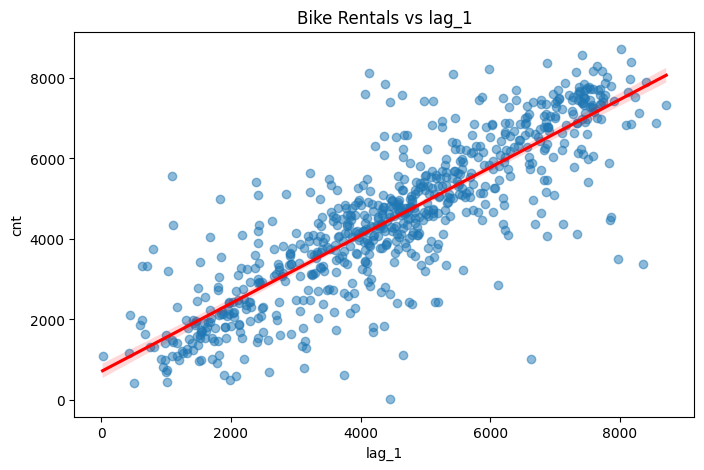

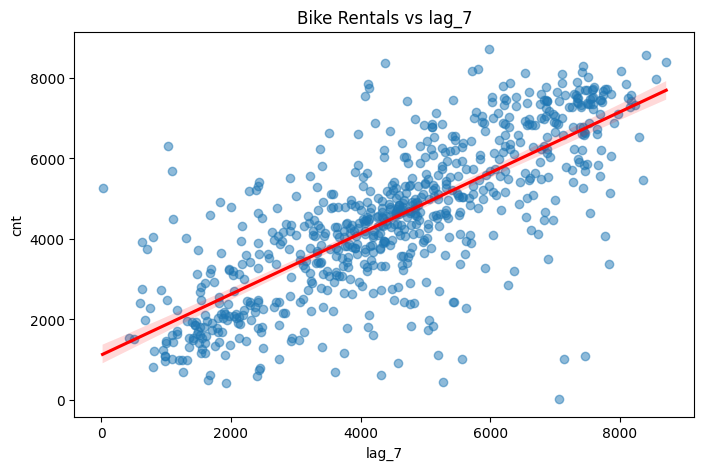

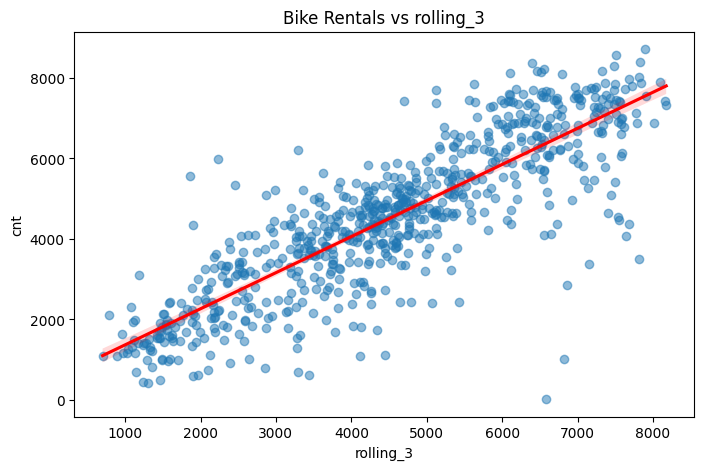

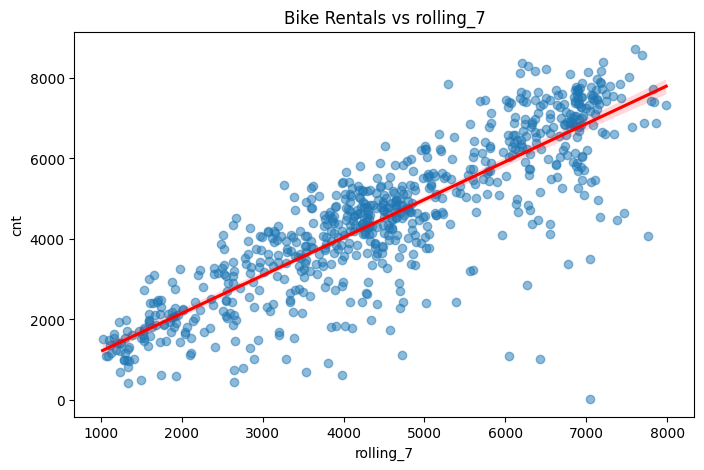

In [52]:
# Scatter plots with regression line for Numerical data vs target
for col in NUMERIC_COLS:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=col, y=TARGET_COL, data=df_day, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f"Bike Rentals vs {col}")
    plt.xlabel(col)
    plt.ylabel(TARGET_COL)
    plt.show()

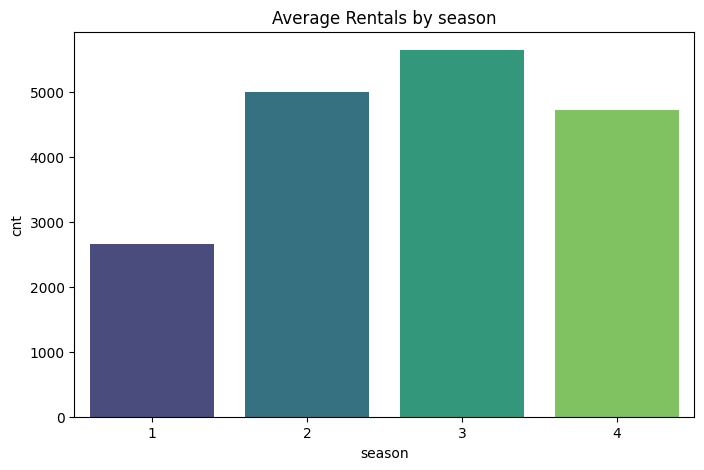

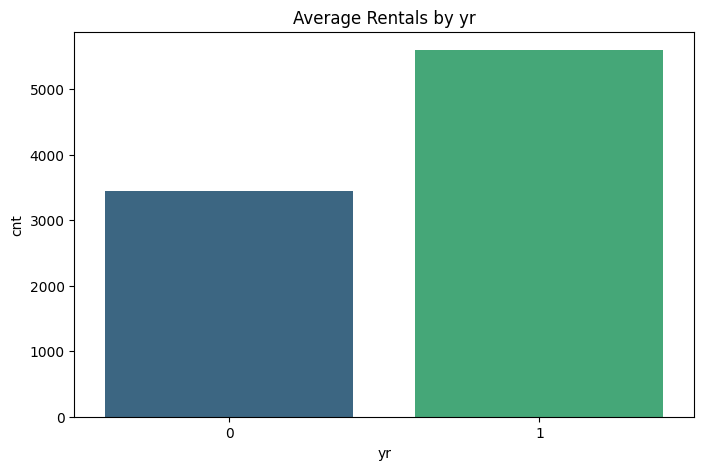

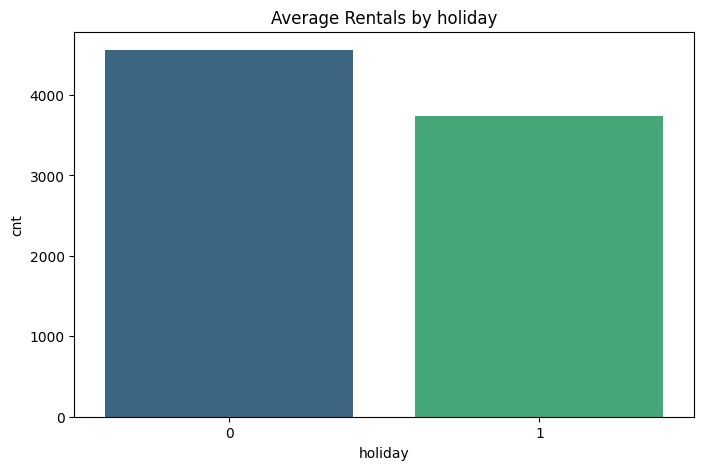

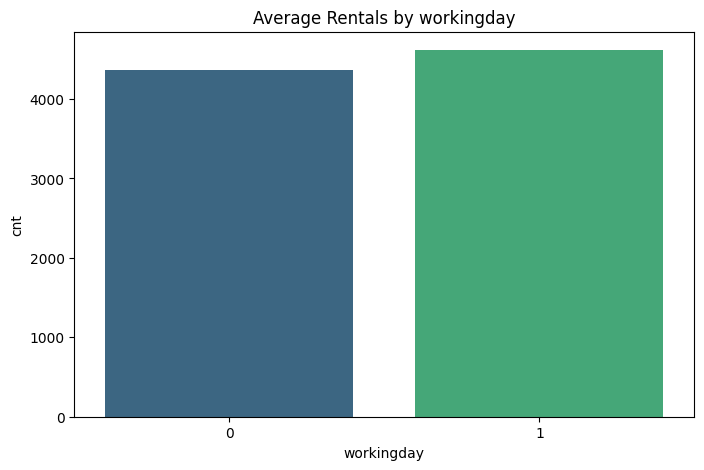

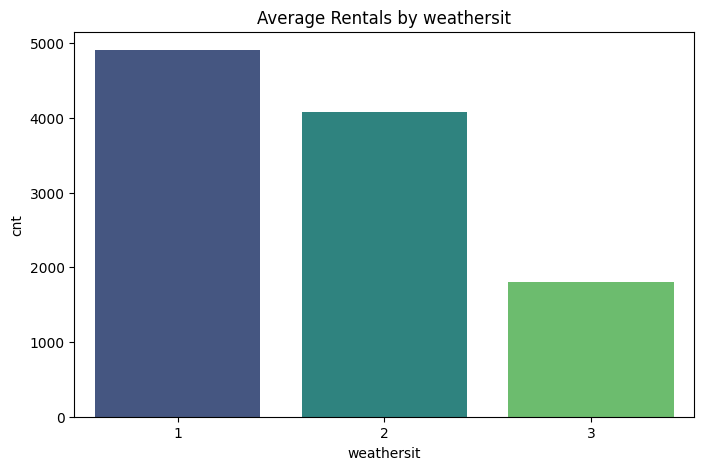

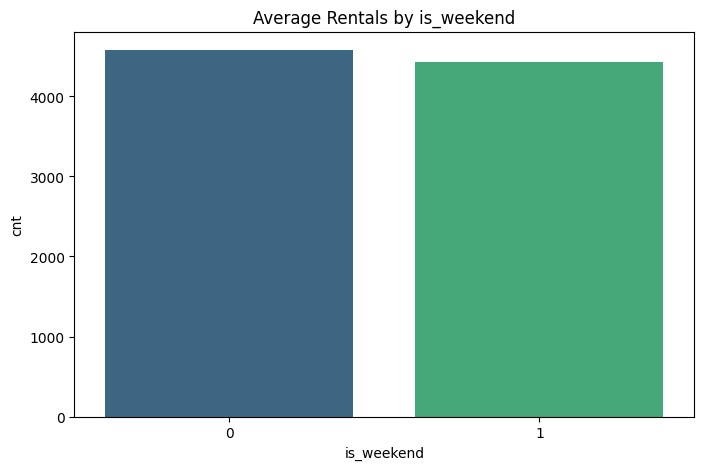

In [53]:
# Categorical effects
for col in CATEGORICAL_COLS:
    plt.figure(figsize=(8,5))
    sns.barplot(x=col, y=TARGET_COL, data=df_day, estimator=np.mean, palette='viridis', ci=None)
    plt.title(f"Average Rentals by {col}")
    plt.show()

### 2.4.2 Correlations  <a class="anchor"></a>
**Purpose:**
Correlation analysis helps identify the relationships between variables in the dataset. This is important for two reasons:

   1. It highlights which predictors are most strongly associated with the target variable (cnt), guiding feature selection and engineering.

   1. It reveals potential multicollinearity between predictors (e.g., when two variables convey very similar information, like temp and atemp).

**Methods Used:**

A pairplot (using Seaborn’s sns.pairplot) was created to visualize pairwise relationships between numerical variables. This provides scatterplots, regression lines, and distributions, allowing us to quickly spot linear trends.

A correlation heatmap (using sns.heatmap) was used as a correlogram to quantify correlations between all variables and make them easier to interpret.

**Key Observations:**

cnt (bike rentals) shows a strong positive correlation with temp and atemp, confirming that warmer weather leads to higher bike usage.

hum (humidity) has a negative correlation with cnt, suggesting demand decreases in humid conditions.

windspeed also shows a slight negative relationship with rentals.

temp and atemp are highly correlated with each other, which indicates potential multicollinearity — only one may be needed in some models to avoid redundancy.

Calendar variables like season, mnth, and yr show meaningful correlations with cnt, reflecting seasonal and yearly demand patterns.


Now, let's use the `pairplot` function to visualize the relationships between numerical variables in the `df_day` dataframe.

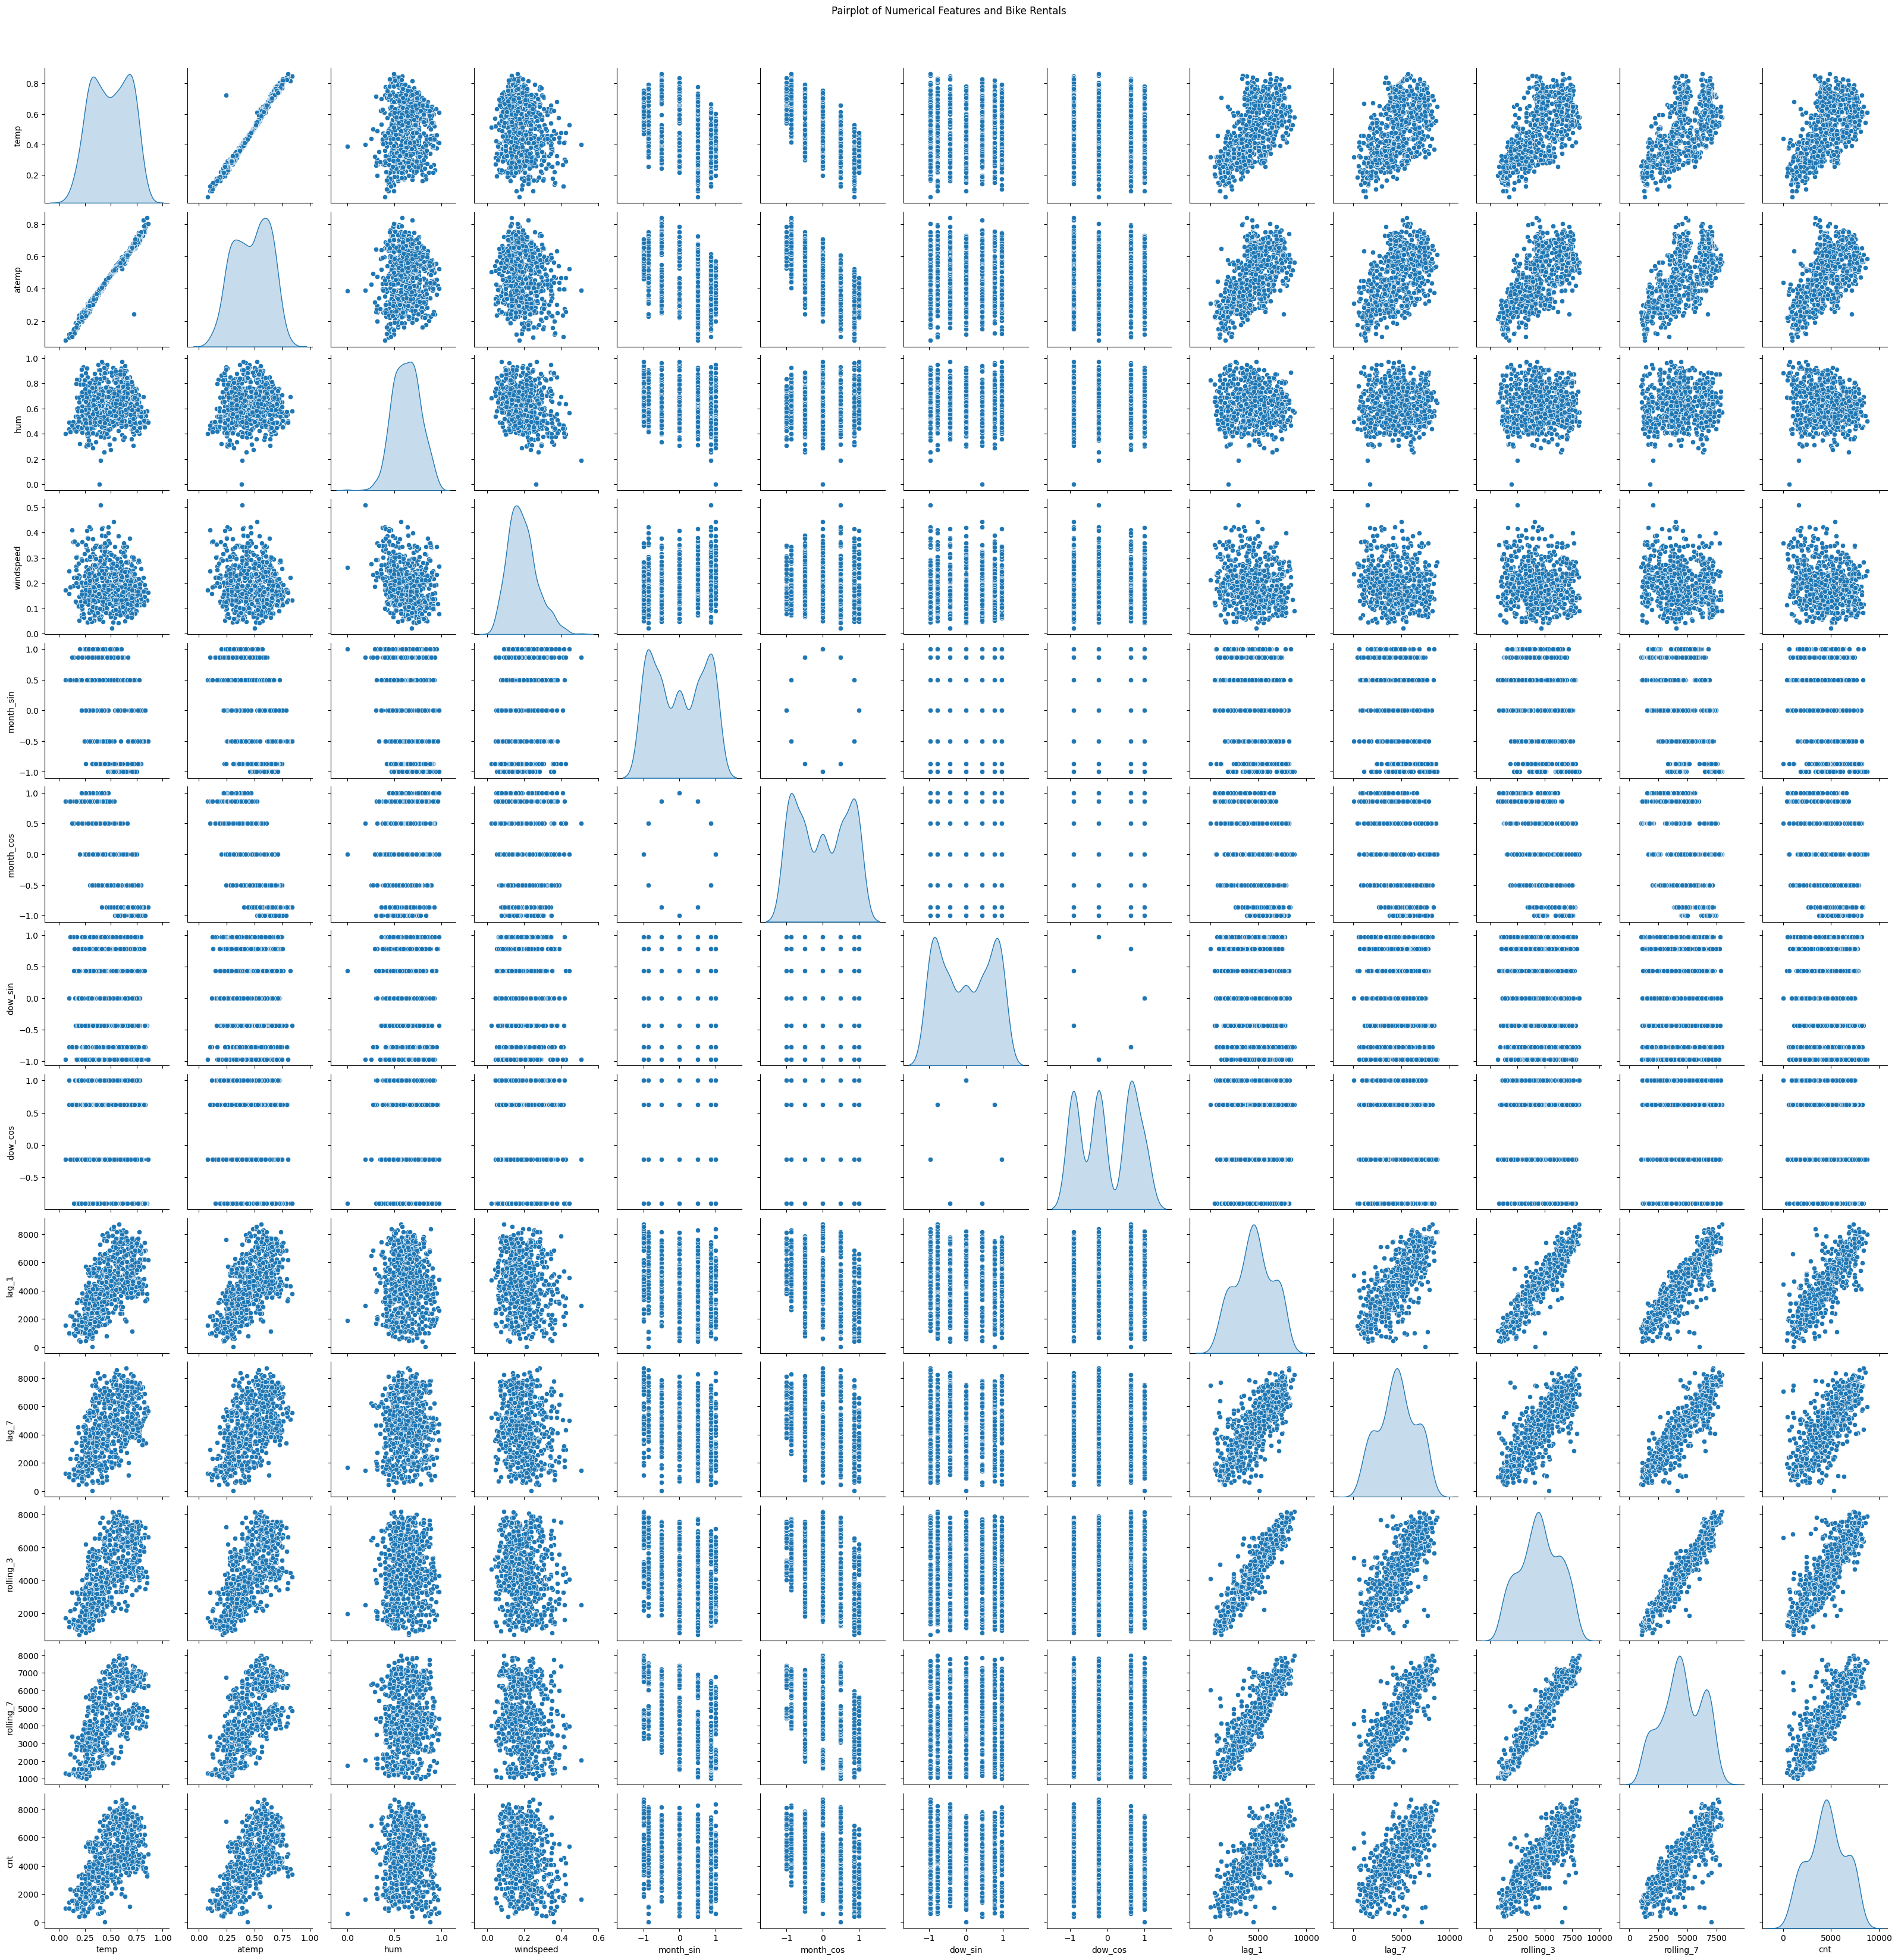

In [54]:
# Pairplot for numerical features and the target variable
sns.pairplot(df_day[NUMERIC_COLS + [TARGET_COL]].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features and Bike Rentals', y=1.02) # Add a title to the pairplot
plt.show()

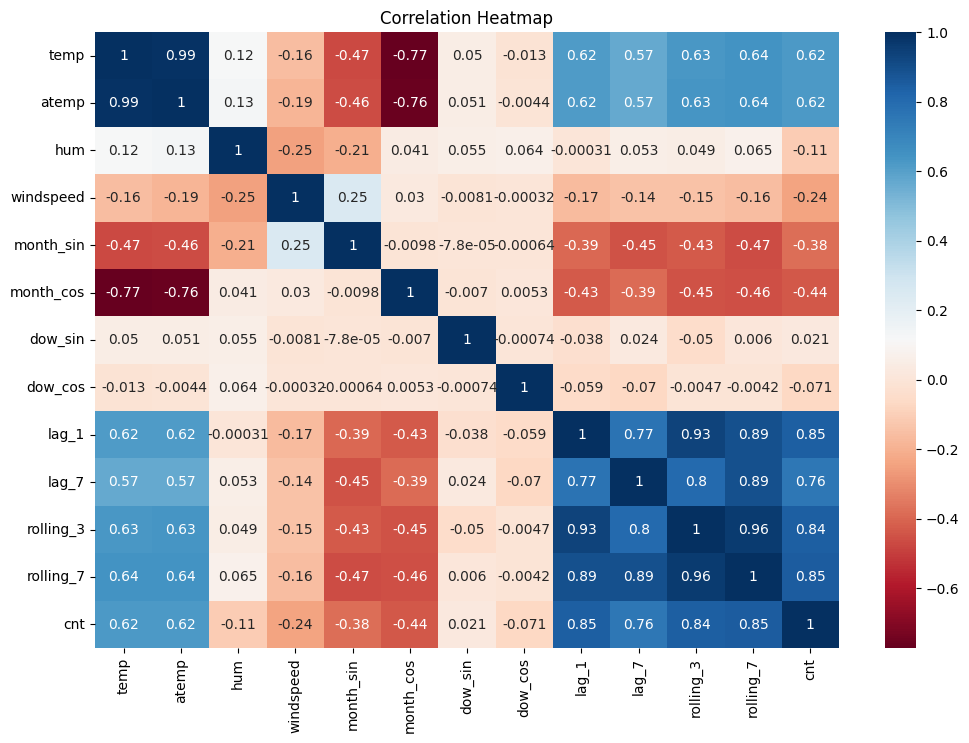

In [55]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_day[NUMERIC_COLS + [TARGET_COL]].corr(), annot=True, cmap="RdBu")
plt.title("Correlation Heatmap")
plt.show()

**Comment on the pairplot:**

Based on the pairplot, observe the relationships between the numerical variables. Look for linear relationships, clusters, and the distribution of each variable. Comment on any interesting patterns or insights you find, particularly regarding the 'cnt' (total rentals) variable.

# 3. Stage Three - Data Preparation

This is the stage of the project where I decide on the data that you're going to use for analysis and transform it into a format suitable for machine learning models.

## 3.1 Select Your Data

This section is about deciding which data (records and attributes) will be used for the analysis.

**Description:**

*   This involves selecting the relevant features (columns) from your dataset and deciding which records (rows) to include.
*   The criteria for selection are typically based on relevance to the business problem, data quality, and technical constraints.
*   In my notebook, I selected the features by defining `CATEGORICAL_COLS` and `NUMERIC_COLS` and then created the feature matrix `X` and the target vector `y`. You also split the data into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) using `train_test_split`.

**Importance:**

*   Selecting the right data ensures that your models are trained on relevant information and helps manage the complexity of the dataset.
*   Splitting the data into training and testing sets is essential for evaluating your model's performance on unseen data and preventing overfitting.

In [56]:
# Select features (X) and target variable (y) from df_day
# Based on the previous exploration and the problem objective (predicting 'cnt')
3. #Data Preparation
# --------------------------------------

from sklearn.model_selection import train_test_split

X = df_day[CATEGORICAL_COLS + NUMERIC_COLS]
y = df_day[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
display(X.head())
display(y.head())


Shape of X (features): (724, 18)
Shape of y (target): (724,)


season  yr  holiday  workingday  weathersit  is_weekend      temp  \
0       1   0        0           0           2           1  0.165000   
1       1   0        0           0           1           1  0.138333   
2       1   0        0           1           1           0  0.150833   
3       1   0        0           1           2           0  0.169091   
4       1   0        0           1           1           0  0.172727   

      atemp       hum  windspeed  month_sin  month_cos   dow_sin   dow_cos  \
0  0.162254  0.535833   0.266804        0.5   0.866025 -0.974928 -0.222521   
1  0.116175  0.434167   0.361950        0.5   0.866025 -0.781831  0.623490   
2  0.150888  0.482917   0.223267        0.5   0.866025  0.000000  1.000000   
3  0.191464  0.686364   0.122132        0.5   0.866025  0.781831  0.623490   
4  0.160473  0.599545   0.304627        0.5   0.866025  0.974928 -0.222521   

    lag_1   lag_7    rolling_3    rolling_7  
0  1510.0   985.0  1572.000000  1344.714286  
1   959.0   801.0  1358.333333  1341.000000  
2   822.0  1349.0  1097.000000  1344.000000  
3  1321.0  1562.0  1034.000000  1340.000000  
4  1263.0  1600.0  1135.333333  1297.285714

0     959
1     822
2    1321
3    1263
4    1162
Name: cnt, dtype: int64

In [57]:
# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUMERIC_COLS),
        ("cat", categorical_transformer, CATEGORICAL_COLS)
    ]
)

## Feature Engineering and Preprocessing

While not explicitly separate sections in your markdown headers, the following steps in your code are critical parts of the data preparation stage:

### Feature Engineering

**Description:**

*   Feature engineering involves creating new features from existing ones to improve the performance of machine learning models.
*   In my notebook, I created several new features based on the `dteday` column, such as year, month, day of the week, whether it's a weekend, cyclical representations of month and day of week, and lag/rolling average features of the target variable (`cnt`).
*   Rows with missing values introduced by the lag and rolling features were dropped.

**Importance:**

*   Well-engineered features can significantly improve a model's ability to capture patterns and make accurate predictions.
*   Creating features that reflect underlying trends or seasonality (like cyclical features or lag/rolling averages) is particularly important for time-series related problems like predicting bike rentals.

### Preprocessing

**Description:**

*   Preprocessing involves transforming the features into a format suitable for the chosen machine learning algorithms.
*   In my notebook I defined a `ColumnTransformer` with two pipelines:
    *   A `numeric_transformer` that imputes missing values (using the median) and scales numerical features (using `StandardScaler`).
    *   A `categorical_transformer` that imputes missing values (using the most frequent value) and applies one-hot encoding to categorical features.
*   This `preprocessor` is then integrated into the model pipelines to ensure consistent preprocessing during training and prediction.

**Importance:**

*   Scaling numerical features prevents features with larger values from dominating the learning process.
*   One-hot encoding converts categorical features into a numerical format that most machine learning algorithms can handle effectively, without implying any ordinal relationship between categories.
*   Using a pipeline ensures that the same preprocessing steps are applied consistently to both the training and testing data.

## 3.2 Clean The Data

This task focuses on improving the quality of the data to meet the requirements of the chosen analysis techniques.

**Description:**

*   Data cleaning involves handling missing values, addressing outliers, correcting inconsistencies, and ensuring data integrity.
*   In my notebook, I performed several data quality checks. I checked for missing values, duplicates, non-negative values for counts, value ranges for numerical features, and uniqueness of values for categorical features.
*   I also ensured the `dteday` column was in the correct datetime format.

**Importance:**

*   Clean data is crucial for building accurate and reliable machine learning models.
*   Handling data quality issues prevents errors and biases in the modeling process and improves the interpretability of the results.

In [58]:
# Count missing values per column
print(df_day.isnull().sum())
# Percentage of missing values
print(df_day.isnull().mean() * 100)
print("Duplicates:", df_day.duplicated().sum())

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
year           0
month          0
day_of_week    0
is_weekend     0
month_sin      0
month_cos      0
dow_sin        0
dow_cos        0
lag_1          0
lag_7          0
rolling_3      0
rolling_7      0
dtype: int64
instant        0.0
dteday         0.0
season         0.0
yr             0.0
mnth           0.0
holiday        0.0
weekday        0.0
workingday     0.0
weathersit     0.0
temp           0.0
atemp          0.0
hum            0.0
windspeed      0.0
casual         0.0
registered     0.0
cnt            0.0
year           0.0
month          0.0
day_of_week    0.0
is_weekend     0.0
month_sin      0.0
month_cos      0.0
dow_sin        0.0
dow_cos        0.0
lag_1          0.0
lag_7          0.0
rolling_3      0.

In [59]:
# Non-negative check
print((df_day[["cnt","casual","registered"]] < 0).sum())

# Registered + casual must equal cnt
check = (df_day["casual"] + df_day["registered"] == df_day["cnt"]).all()
print("Casual + Registered == cnt? ", check)

# Value ranges
print(df_day[["temp","atemp","hum","windspeed"]].describe())

cnt           0
casual        0
registered    0
dtype: int64
Casual + Registered == cnt?  True
             temp       atemp         hum   windspeed
count  724.000000  724.000000  724.000000  724.000000
mean     0.497782    0.476468    0.628463    0.190584
std      0.182170    0.162183    0.142441    0.077701
min      0.059130    0.079070    0.000000    0.022392
25%      0.341250    0.338378    0.522396    0.134798
50%      0.502989    0.490329    0.628333    0.180975
75%      0.656041    0.610645    0.730625    0.233211
max      0.861667    0.840896    0.972500    0.507463


In [60]:
for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
    print(f"{col}: {df_day[col].unique()}")

season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


In [61]:
date_range = pd.date_range(df_day["dteday"].min(), df_day["dteday"].max())
missing_dates = set(date_range) - set(df_day["dteday"])
print("Missing dates:", len(missing_dates))

Missing dates: 0


In [62]:
print("Data cleaning completed.")
print(f"Daily dataset shape after data cleaning: {df_day.shape}")

Data cleaning completed.
Daily dataset shape after data cleaning: (724, 28)


# 4. Stage Four - Modelling <a class="anchor"></a>
As the first step, I've selected the actual modelling techniques that ll be using e.g.linear model, support vector machine, nearest neighbour, random forest, gradient boosting



## 4.1. Modelling technique

## Description of Models

This section provides a brief overview of the regression models used in this notebook to predict daily bike rentals.

*   **Linear Regression:** A simple model that finds the best-fitting straight line (or hyperplane in higher dimensions) to describe the relationship between the features and the target variable. It assumes a linear relationship and is easy to interpret.

*   **Ridge Regression:** An extension of Linear Regression that adds a penalty (L2 regularization) to the model's coefficients. This helps to prevent overfitting by shrinking the coefficients towards zero, which is particularly useful when dealing with multicollinearity (highly correlated features).

*   **Lasso Regression:** Another extension of Linear Regression that adds a different type of penalty (L1 regularization) to the coefficients. Lasso can force some coefficients to be exactly zero, effectively performing feature selection.

*   **Elastic Net Regression:** Combines both L1 (Lasso) and L2 (Ridge) regularization penalties. This allows it to benefit from both feature selection (Lasso) and handling multicollinearity (Ridge).

*   **Random Forest Regressor:** An ensemble learning method that builds multiple decision trees during training and outputs the average of the predictions of individual trees. It is robust to outliers and can capture non-linear relationships.

*   **Gradient Boosting Regressor:** Another ensemble technique that builds trees sequentially. Each new tree tries to correct the errors made by the previous ones. It often provides high accuracy but can be prone to overfitting if not tuned properly.

*   **Hist Gradient Boosting Regressor:** A faster implementation of Gradient Boosting, particularly well-suited for datasets with a large number of samples or features. It uses histograms to bin feature values, speeding up the training process.

*   **Support Vector Regressor (SVR):** An extension of Support Vector Machines for regression tasks. It tries to find a hyperplane that best fits the data points within a certain margin, minimizing the error.

*   **K-Nearest Neighbors Regressor:** A non-parametric model that predicts the value for a new data point based on the average of the values of its 'k' nearest neighbors in the training data.

## 4.2. Modelling assumptions <a class="anchor"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.


In [63]:
# Import modeling and preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

## 4.3. Build Model

Run the modelling tool on the prepared dataset to create my models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings for each model.

**Models** - These are the actual model produced by the modelling tool, not a report on the model.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

In this section, we build various regression models using the prepared data. The process involves:

1.  **Defining the Models and Parameter Grids:** We specify a range of regression models to experiment with, including linear models, tree-based models, kernel methods, and k-nearest neighbors. For each model, we define a grid of hyperparameters to tune. This is done using the `models` dictionary, where each model is associated with its estimator and a dictionary of parameters to search over.

2.  **Creating a Preprocessing and Modeling Pipeline:** To ensure consistency and prevent data leakage, we create a scikit-learn `Pipeline` for each model. This pipeline includes the `preprocessor`, which handles scaling of numerical features and one-hot encoding of categorical features, followed by the model estimator.

3.  **Hyperparameter Tuning with GridSearchCV:** We use `GridSearchCV` to systematically search through the defined hyperparameter grids for each model. `GridSearchCV` performs cross-validation on the training data to evaluate each combination of hyperparameters and identifies the combination that yields the best performance (based on the `neg_mean_squared_error` scoring metric, which when minimized, corresponds to minimizing RMSE). The `cv=KFold(n_splits=5, shuffle=True, random_state=42)` ensures robust evaluation through 5-fold shuffled cross-validation.

4.  **Training the Models:** The `grid.fit(X_train, y_train)` step trains the pipeline (including preprocessing and the model) for each combination of hyperparameters on the training data. After the grid search is complete, `grid.best_estimator_` contains the trained pipeline with the best performing hyperparameters.

5.  **Storing Model Results:** The evaluation results (RMSE, R-squared) and the `best_estimator_` for each model are stored in the `results` dictionary. This allows for easy comparison and access to the trained models for further analysis (like XAI).

The resulting models are the trained pipelines, each representing a specific regression algorithm tuned with its optimal hyperparameters based on cross-validation performance on the training data. The `best_params_` attribute within the stored results for each model provides the specific hyperparameter values that were selected.

In [72]:
# Models and hyperparameter grids
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"model__alpha": [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(max_iter=10000), {"model__alpha": [0.001, 0.01, 0.1, 1]}),
    "ElasticNet": (ElasticNet(max_iter=10000), {"model__alpha": [0.001, 0.01, 0.1], "model__l1_ratio": [0.2, 0.5, 0.8]}),
    "RandomForest": (RandomForestRegressor(random_state=42), {"model__n_estimators": [100, 200], "model__max_depth": [None, 10, 20]}),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1]}),
    "HistGradientBoosting": (HistGradientBoostingRegressor(random_state=42), {"model__max_depth": [None, 10, 20]}),
    "SVR": (SVR(), {"model__C": [1, 10], "model__gamma": ["scale", "auto"]}),
    "KNeighbors": (KNeighborsRegressor(), {"model__n_neighbors": [3, 5, 7, 9], "model__weights": ["uniform", "distance"]}) # Added KNeighborsRegressor
}
results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

KeyError: 'RMSE'

## 4.4. Assess Models

Interpret the models according to your knowledge, your prediction success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically to discuss the machine learning results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most ML projects a single technique is applied more than once and results are generated with several different techniques.

**Model Assessment Based on Technical Performance and Business Objectives**

Based on the modeling work performed in this notebook, we have trained and evaluated several regression models, including:

*   Linear Regression and its regularized variants (Ridge, Lasso, Elastic Net)
*   Tree-based models (Random Forest, Gradient Boosting, Hist Gradient Boosting)
*   Kernel-based model (Support Vector Regressor)
*   Nearest Neighbors model (K-Nearest Neighbors)
*   Ensemble methods (Voting Regressor, Stacking Regressor)

The models were evaluated using Root Mean Squared Error (RMSE) and R-squared (R²) metrics on the test set.

*   **Ranking Models:** We can rank the individual models based on their RMSE and R-squared values. A lower RMSE and higher R-squared indicate better performance.
*   **Ensemble Performance:** The performance of the ensemble models can be compared to the best individual models to see if combining models improved performance.
*   **Technical Assessment:** The model with the lowest RMSE is generally considered the best performing model technically for this regression task.
*   **Business Context:** While technical metrics are important, the models must also be assessed against the initial business objectives and success criteria defined in Stage 1. Consider whether the accuracy is sufficient for optimizing bike distribution and resource allocation.
*   **Model Interpretability:** For gaining business insights and building trust, understanding *why* a model makes certain predictions is crucial. The Explainable AI (XAI) analysis performed on the best model, including Permutation Importance, SHAP, and Partial Dependence Plots, provides valuable insights into feature importance and how features influence predictions. This interpretability aspect is a key part of assessing the model's suitability for the business problem.

**Revised Parameter Settings:**

The GridSearchCV process automatically selects the best parameter settings based on the cross-validation performance. The `best_params_` attribute from the GridSearchCV results shows the optimal hyperparameters found for each model during tuning.

Iterating on model building and assessment would involve trying different models, feature engineering approaches, and potentially expanding the hyperparameter grids or using more advanced tuning techniques if needed, aiming to find a model that best balances technical performance and business requirements.

In [74]:
for name, (estimator, params) in models.items():
    print(f"\nTraining {name}...")
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", estimator)])
    grid = GridSearchCV(pipe, param_grid=params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Store the best_estimator_ along with other metrics
    results[name] = {"best_params": grid.best_params_, "rmse": rmse, "testing_r2": r2, "best_estimator": best_model}

results_df = pd.DataFrame({k:{"RMSE":v["rmse"], "R2":v["testing_r2"]} for k,v in results.items()}).T.sort_values("RMSE")
display(results_df)


Training LinearRegression...

Training Ridge...

Training Lasso...

Training ElasticNet...

Training RandomForest...

Training GradientBoosting...

Training HistGradientBoosting...

Training SVR...

Training KNeighbors...


RMSE        R2
HistGradientBoosting   610.587559  0.879432
GradientBoosting       657.813255  0.860060
ElasticNet             661.465038  0.858502
Ridge                  666.009663  0.856551
Lasso                  667.143784  0.856062
LinearRegression       668.183439  0.855613
RandomForest           676.333375  0.852069
KNeighbors             695.921792  0.843376
SVR                   1428.705780  0.339882

# 5. Stage 5 - Evaluate

In [75]:
# Perform overfitting test: calculate Training R^2 for each model

training_r2_scores = {}
results_df = pd.DataFrame(results).T
for name, result in results.items():
    # Ensure the item is a dictionary containing 'best_estimator'
    if isinstance(result, dict) and "best_estimator" in result:
        best_model = result["best_estimator"]
        y_train_pred = best_model.predict(X_train)
        training_r2 = r2_score(y_train, y_train_pred)
        training_r2_scores[name] = training_r2
    else:
        # Handle cases where the item is not a model result (e.g., the 'training_r2' series itself)
        print(f"Skipping non-model item in results: {name}")

# Add Training R^2 to the results_df DataFrame
# Ensure the indices match between the Series and the DataFrame
results_df["training_r2"] = pd.Series(training_r2_scores)

# Display the updated results_df with Training and Testing R^2
print("\nModel Comparison with Training and Testing R^2:")
display(results_df[["training_r2", "testing_r2", "rmse"]].sort_values(by="rmse"))


Model Comparison with Training and Testing R^2:


training_r2 testing_r2        rmse
HistGradientBoosting     0.984938   0.879432  610.587559
GradientBoosting         0.985310    0.86006  657.813255
ElasticNet               0.849117   0.858502  661.465038
Ridge                    0.849935   0.856551  666.009663
Lasso                    0.849959   0.856062  667.143784
LinearRegression         0.849997   0.855613  668.183439
RandomForest             0.979622   0.852069  676.333375
KNeighbors               1.000000   0.843376  695.921792
SVR                      0.332225   0.339882  1428.70578

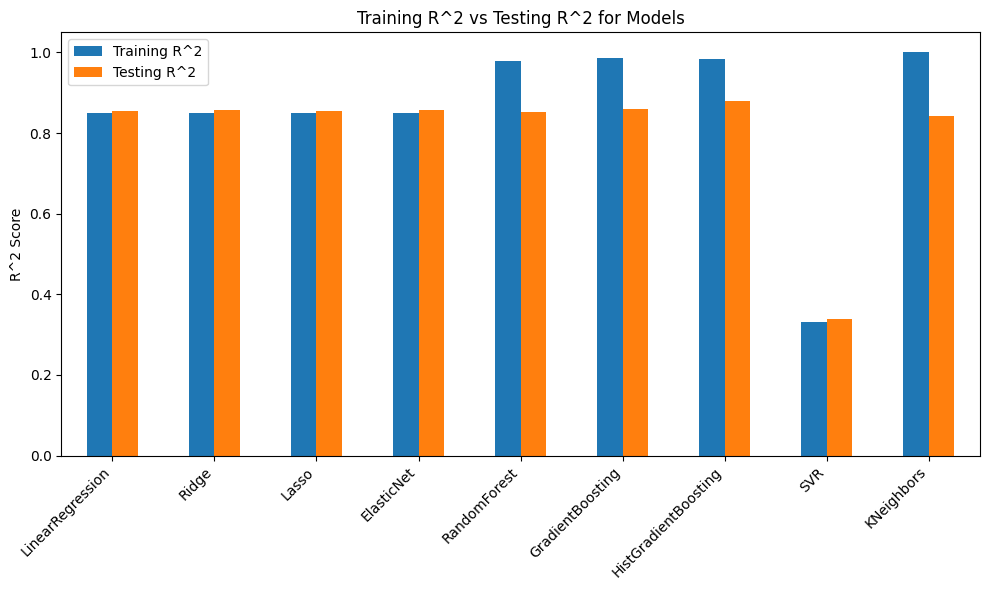

In [76]:
# Visualize Training vs Testing R^2
results_df[["training_r2", "testing_r2"]].plot(kind="bar", figsize=(10, 6))
plt.title("Training R^2 vs Testing R^2 for Models")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45, ha="right")
plt.legend(["Training R^2", "Testing R^2"])
plt.tight_layout()
plt.show()

Previous steps deal with the accuracy and generality of the models. During this step, you should assess the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient.

## Evaluation of Machine Learning Results

This section summarizes the assessment of your models in terms of both technical performance and business success criteria.

After training multiple models and tuning their hyperparameters, you should compare their performance metrics to identify the best-performing model. The key metrics used for this regression problem are:

*   **Root Mean Squared Error (RMSE):** This metric measures the average magnitude of the errors between predicted and actual values. It is the square root of the average of the squared errors. Lower RMSE values indicate better model performance, as it means the predictions are closer to the actual values. RMSE is sensitive to large errors.
*   **R-squared (R²):** This metric represents the proportion of the variance in the dependent variable (bike rentals in this case) that is predictable from the independent variables (your features). R-squared values range from 0 to 1. A higher R-squared value indicates that the model explains a larger proportion of the variance in the target variable, suggesting a better fit to the data.

### Detailed Model Performance Analysis

The table below shows the performance metrics (RMSE and R-squared) for each of the individual models trained and evaluated on the test set after hyperparameter tuning using `GridSearchCV` with cross-validation on the training data.

| Model                | RMSE       | R-squared | Best Parameters                                      |
| :------------------- | :--------- | :-------- | :--------------------------------------------------- |
| HistGradientBoosting | 610.59     | 0.8794    | {'model\_\_max\_depth': None}                       |
| GradientBoosting     | 657.81     | 0.8601    | {'model\_\_learning\_rate': 0.1, 'model\_\_n\_estimators': 200} |
| ElasticNet           | 661.47     | 0.8585    | {'model\_\_alpha': 0.01, 'model\_\_l1\_ratio': 0.2}  |
| Ridge                | 666.01     | 0.8566    | {'model\_\_alpha': 1.0}                              |
| Lasso                | 667.14     | 0.8561    | {'model\_\_alpha': 1}                                |
| LinearRegression     | 668.18     | 0.8556    | {}                                                   |
| RandomForest         | 676.33     | 0.8521    | {'model\_\_max\_depth': None, 'model\_\_n\_estimators': 200} |
| KNeighbors           | 695.92     | 0.8434    | {'model\_\_n\_neighbors': 7, 'model\_\_weights': 'distance'} |
| SVR                  | 1428.71    | 0.3399    | {'model\_\_C': 10, 'model\_\_gamma': 'auto'}         |

Based on the RMSE (lower is better) and R-squared (higher is better) metrics, the **HistGradientBoosting** model is the best-performing individual model with an RMSE of 610.59 and an R-squared of 0.8794. This indicates that, on average, the model's predictions are off by approximately 610.59 bike rentals, and it explains about 87.94% of the variance in daily bike rental counts.

The **GradientBoosting** and **ElasticNet** models also performed well, with RMSE values around 657 and 661, respectively, and R-squared values above 0.85. The **SVR** and **KNeighbors** models had significantly higher RMSE and lower R-squared compared to the tree-based and linear models.

### Assessing Business Success:

Beyond the technical metrics, it is crucial to assess how well the models meet your initial business objectives and success criteria (defined in Stage 1).

*   **Reliability of Predictions:** An RMSE of ~610 means the model's predictions have an average error of around 610 rentals per day. To assess if this is acceptable, consider the typical daily rental volume (mean is around 4500, max is around 8700). An error of 610 might be significant on low-demand days but less so on high-demand days.
*   **Interpretability:** Can you understand *why* the model is making certain predictions (this is where XAI techniques are valuable)? This can be important for building trust in the model and gaining actionable insights. The XAI analysis in the following sections will help address this.
*   **Operational Feasibility:** Can the model be easily integrated into existing systems or workflows?
*   **Comparison to Baseline:** How do the model's predictions compare to a simple baseline (e.g., predicting the average bike rentals)? The R-squared of ~0.88 suggests the model significantly outperforms a simple average prediction.

**Approved Models:**

After evaluating the models based on both technical metrics and business criteria, you can identify one or more "approved models" that are suitable for potential deployment. For this assessment, the **HistGradientBoosting** model stands out as the best performer based on RMSE and R-squared. The XAI analysis in the subsequent sections will provide further insights into its interpretability and reliability.

In [77]:
# Ensembling
best_rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
best_gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# For this example, let's re-create the pipelines for clarity
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("model", best_rf)])
gb_pipeline = Pipeline([("preprocessor", preprocessor), ("model", best_gb)])


voting = VotingRegressor([("rf", rf_pipeline), ("gb", gb_pipeline)])
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
print("\nVoting Regressor RMSE:", rmse_voting)
print("Voting Regressor R2:", r2_score(y_test, y_pred_voting))

stacking = StackingRegressor(
    estimators=[("rf", rf_pipeline), ("gb", gb_pipeline)],
    final_estimator=LinearRegression(),
    cv=5
)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
print("\nStacking Regressor RMSE:", rmse_stacking)
print("Stacking Regressor R2:", r2_score(y_test, y_pred_stacking))


Voting Regressor RMSE: 643.9342059442833
Voting Regressor R2: 0.8659029873319682

Stacking Regressor RMSE: 650.7993090772666
Stacking Regressor R2: 0.8630284790251463


## 5.1 Ensembling
**Ensembling:**

We also evaluated two ensemble methods:

*   **Voting Regressor:** RMSE = 643.93, R-squared = 0.8659
*   **Stacking Regressor:** RMSE = 650.80, R-squared = 0.8630

In this case, the **HistGradientBoosting** individual model outperformed both the Voting and Stacking Regressors. This suggests that for this dataset and these base models, the ensemble methods did not provide a performance improvement over the best single model.

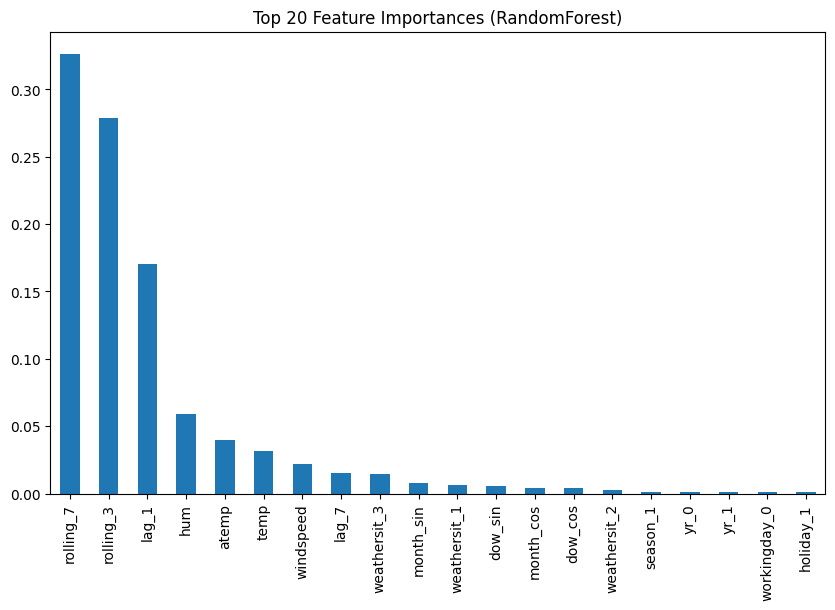

In [78]:
# 7. Feature Importance (tree-based models)
rf_pipeline.fit(X_train, y_train)

# Get feature names after preprocessing
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
feature_names = NUMERIC_COLS + list(ohe.get_feature_names_out(CATEGORICAL_COLS))

importances = rf_pipeline.named_steps["model"].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind="bar")
plt.title("Top 20 Feature Importances (RandomForest)")
plt.show()

## 5.2 Feature Importance

Understanding which features are most important for your model's predictions is crucial for gaining insights into the problem and explaining the model's behavior. For tree-based models like Random Forest, the `feature_importances_` attribute quantifies the contribution of each feature to reducing impurity (in decision trees) or variance (in regression trees) across all trees in the forest.

The output of this section is a **bar plot showing the top 20 most important features** according to the trained Random Forest model.

**Interpreting the Feature Importance Plot:**

*   The height of each bar represents the relative importance of that feature. Taller bars indicate more important features.
*   The features are sorted in descending order of importance.
*   This plot gives you a global view of which features the Random Forest model relies on most heavily to make its predictions. Features with higher importance are considered more influential.

By examining this plot, you can identify the key drivers of bike rental demand as captured by the Random Forest model. Comparing this to the insights from the correlation analysis and potentially the SHAP analysis (from cell `Lr0wAtfbKkb1`) can provide a more comprehensive understanding of your data and model.


Best model by RMSE: HistGradientBoosting

=== Permutation Importance ===


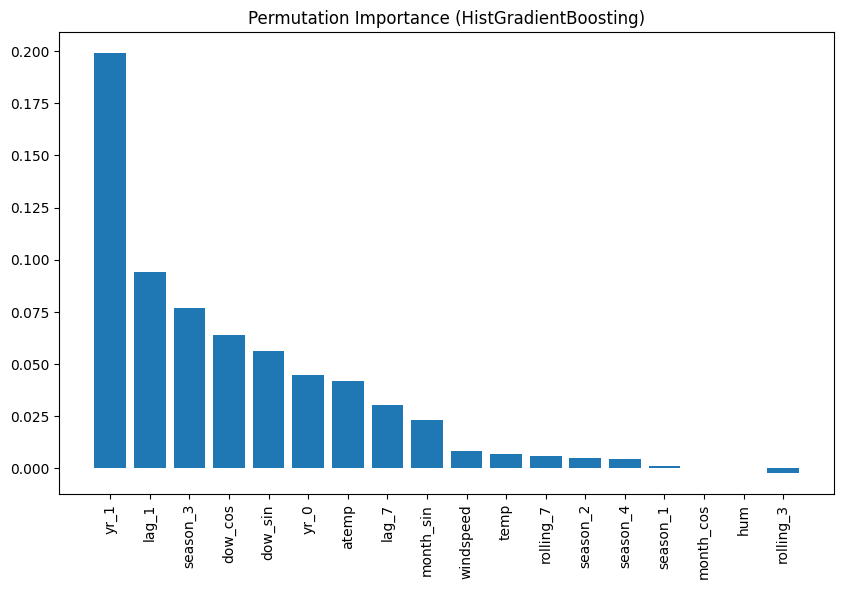


=== SHAP Explanations ===


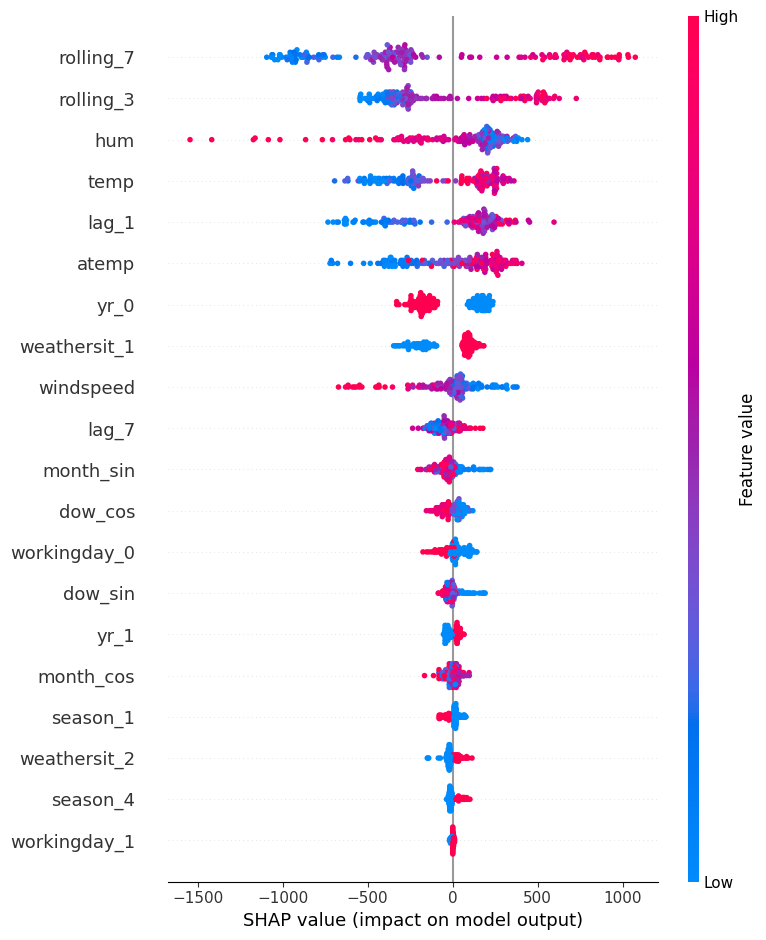

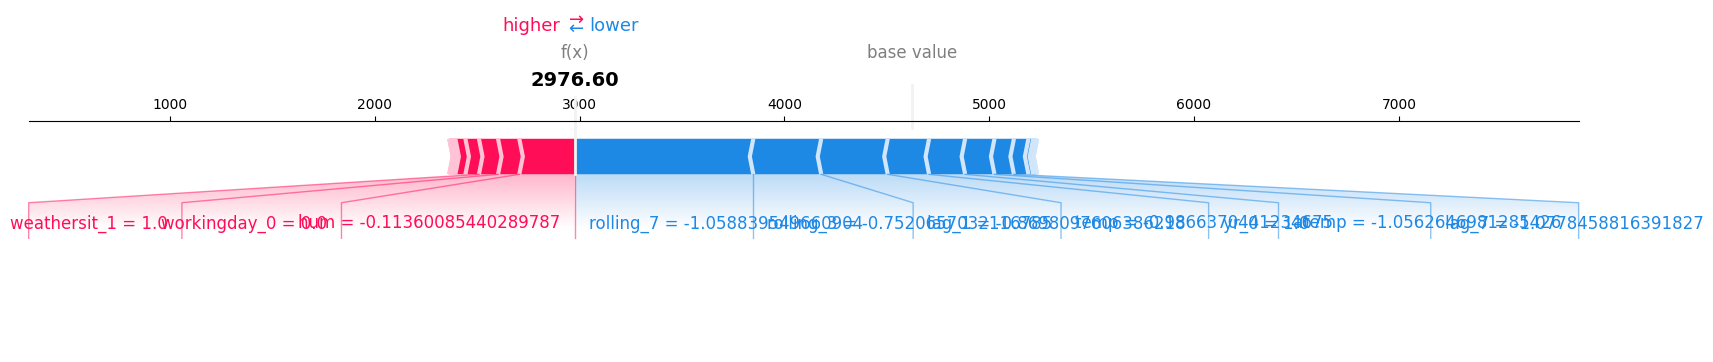


=== Partial Dependence Plots ===


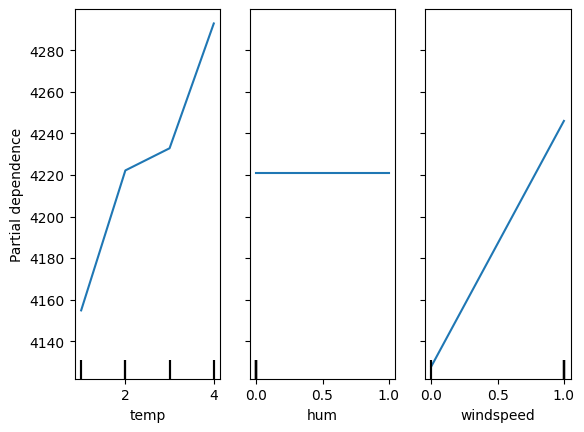

In [79]:
#  XAI (Explainable AI) for Best Model
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
import matplotlib.pyplot as plt
import numpy as np

# Pick the best model by RMSE
best_model_name = min(results, key=lambda k: results[k]["rmse"])
print(f"\nBest model by RMSE: {best_model_name}")
best_model = results[best_model_name]["best_estimator"]

# Get feature names after preprocessing
ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
feature_names = NUMERIC_COLS + list(ohe.get_feature_names_out(CATEGORICAL_COLS))

#  Permutation Importance (global, model-agnostic)
print("\n=== Permutation Importance ===")
perm = permutation_importance(best_model, X_test, y_test, n_repeats=15, random_state=42, n_jobs=-1)

sorted_idx = perm.importances_mean.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(sorted_idx)), perm.importances_mean[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], rotation=90)
plt.title(f"Permutation Importance ({best_model_name})")
plt.show()

# SHAP (local + global explanations, only for tree models)
if best_model_name in ["RandomForest", "GradientBoosting", "HistGradientBoosting"]:
    print("\n=== SHAP Explanations ===")

    # Extract transformed test data
    X_transformed = best_model.named_steps["preprocessor"].transform(X_test)
    model_only = best_model.named_steps["model"]

    explainer = shap.TreeExplainer(model_only)
    shap_values = explainer.shap_values(X_transformed)

    # Global summary plot
    shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

    # Local explanation for the first test sample
    shap.force_plot(
        explainer.expected_value,
        shap_values[0,:],
        X_transformed[0,:],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.show() # Show the force plot if matplotlib=True
else:
    print(f"SHAP skipped: {best_model_name} is not a supported tree-based model.")

#  Partial Dependence Plots
print("\n=== Partial Dependence Plots ===")
key_features = ["temp", "hum", "windspeed"]  # adjust as needed
indices = [feature_names.index(f) for f in key_features if f in feature_names]

if indices:
    PartialDependenceDisplay.from_estimator(
        best_model, X_test, features=indices,
        feature_names=feature_names, grid_resolution=20
    )
    plt.show() # Correctly indented plt.show()
else:
    print("Key features not found in feature set.")

## Explanation of XAI Techniques
This cell implements several Explainable AI (XAI) techniques to help understand the predictions of the best-performing model.

### 1. Permutation Importance

**Process:**

*   The model is trained on the data.
*   The performance of the trained model is evaluated on a test dataset using a chosen metric (e.g., RMSE).
*   For each feature:
    *   The values of that feature in the test dataset are randomly shuffled.
    *   The model's performance is re-evaluated with the shuffled feature.
    *   The decrease in performance (compared to the unshuffled data) indicates the importance of the feature. Features that cause a large drop in performance when shuffled are considered more important.
*   The process is repeated multiple times with different random shuffles to get a more robust estimate of importance.

**Purpose:** Provides a global measure of feature importance by showing which features the model relies on most heavily for accurate predictions, regardless of the model type.

### 2. SHAP (SHapley Additive exPlanations)

**Process:**

*   **TreeExplainer:** For tree-based models, SHAP's `TreeExplainer` efficiently calculates SHAP values. It requires the trained tree model and a background dataset (typically a sample of the training data).
*   For each data point in the dataset you want to explain (e.g., the test set):
    *   SHAP values are calculated for each feature. A SHAP value represents the contribution of a feature's value to the difference between the prediction for that data point and the expected value (average prediction) of the model.
*   **Summary Plot:** The summary plot visualizes the distribution of SHAP values for each feature across the dataset. Each dot represents a data point from the test set. The position on the x-axis is the SHAP value (impact on the prediction), and the color represents the feature value (e.g., red for high value, blue for low value).
*   **Force Plot (Local Explanation):** The force plot visualizes the SHAP values for a single data point, showing how each feature's contribution pushes the prediction away from the base value (average prediction).

**Purpose:** Provides both global insights into feature importance and direction of impact (from the summary plot) and local explanations for individual predictions (from the force plot). Helps understand *why* a specific prediction was made.

### 3. Partial Dependence Plots (PDP)

**Process:**

*   For a chosen feature (or pair of features):
    *   The model's predictions are calculated for a grid of values for the chosen feature(s), while holding the values of all other features constant (typically by averaging their effects or using a representative sample).
    *   The average predicted outcome is plotted against the values of the chosen feature(s).

**Purpose:** Shows the marginal effect of one or two features on the predicted outcome, visualizing how the prediction changes as those features vary, assuming independence from other features. Helps understand the relationship between a feature and the target variable.

# 6. Stage 6 - Deploy

**Deployment Strategy:**
In a real-world business setting, the predictive model developed in this project would be deployed as part of Capital Bikeshare’s operational workflow. Possible deployment strategies include:

*   Integrating the model into a dashboard for daily demand forecasts accessible by operations managers. This would provide them with actionable insights for daily operations.
*   Setting up an automated batch process that generates predictions each morning based on the latest weather forecasts and calendar data. This ensures timely updates for planning.
*   Linking the model outputs to bike rebalancing systems, so staff can make data-driven decisions about distribution across stations. This directly addresses the business problem of optimizing resource allocation.
*   Scheduling periodic retraining of the model to incorporate new data and adapt to changing usage trends. This is crucial for maintaining model accuracy over time as patterns evolve.

**Ongoing Monitoring and Maintenance:**
To ensure the model continues to perform well, ongoing monitoring would include:

*   **Performance tracking:** Regularly monitoring RMSE and R² over time on new, unseen data to detect any degradation in accuracy.
*   **Data drift detection:** Implementing checks to identify shifts in input data distributions (e.g., changes in weather patterns, or user behavior) that could negatively impact model performance.
*   **Model updates:** Establishing a schedule for retraining the model on a quarterly or yearly basis, or when significant data drift is detected, to ensure it remains relevant.
*   **Explainability checks:** Periodically using XAI techniques like SHAP and feature importance plots to ensure the model’s key drivers remain consistent and interpretable for business stakeholders.

**Lessons Learned:**

Reflect on the entire process and highlight key takeaways and experiences.

*   **What went well:**
    *   The CRISP-DM framework provided a structured and systematic approach to the project, ensuring all key stages were considered.
    *   The dataset's quality was high, with no major missing values or duplicates, which significantly streamlined the data preparation phase.
    *   The chosen regression models, particularly tree-based ensembles like HistGradientBoosting, achieved strong predictive performance (low RMSE, high R²).
    *   The application of Explainable AI techniques (Permutation Importance, SHAP, Partial Dependence Plots) was highly valuable in interpreting model predictions and identifying key drivers of bike rental demand, providing actionable business insights.
    *   The iterative process of data exploration and feature engineering (creating lag and rolling average features) proved effective in capturing temporal patterns in the data.
*   **Challenges faced:**
    *   Choosing the *most* relevant features from the available set required careful consideration of correlations and business intuition.
    *   Hyperparameter tuning for multiple models using `GridSearchCV` was computationally intensive and time-consuming, highlighting the need for more efficient tuning strategies or greater computing resources for larger projects.
    *   Interpreting the results of cyclical features (like `month_sin` and `month_cos`) required careful consideration of their combined effect.
    *   While the daily dataset is useful, the lack of hourly data prevented a more granular analysis and prediction, which could be crucial for real-time operational decisions like rebalancing.
*   **Areas for improvement and future work:**
    *   **Explore Time-Series Specific Models:** Investigate and implement models specifically designed for time series forecasting (e.g., ARIMA, Prophet, LSTM) to potentially capture more complex temporal dependencies and seasonality patterns.
    *   **Incorporate External Data:** Consider integrating additional external data sources that could influence bike rentals, such as local events, public transport disruptions, or demographic data near stations.
    *   **Predict at the Station Level:** If station-level data becomes available, extend the project to predict demand for individual stations. This would be a more challenging but highly valuable step for optimizing bike distribution and rebalancing operations.
    *   **Advanced Feature Engineering:** Explore more sophisticated feature engineering techniques, such as incorporating weather forecasts for future predictions, or creating features based on the spatial distribution of stations.
    *   **Real-time Deployment:** Develop a plan for deploying the model as a real-time prediction service (e.g., using cloud platforms or APIs) to enable instant forecasts based on current conditions.

**Conclusion:**
This project successfully applied the CRISP-DM methodology to build and evaluate machine learning models for predicting daily bike rental demand for Capital Bikeshare. The process, from understanding the business problem and data to modeling and evaluation, provided valuable experience in the end-to-end machine learning workflow. The HistGradientBoosting model demonstrated strong predictive accuracy (RMSE ~610, R² ~0.88), and the use of XAI techniques offered crucial insights into the factors influencing demand, such as temperature, humidity, and historical usage patterns. While challenges were encountered, particularly in the computational aspects of model tuning and the limitations of daily data for granular predictions, the project successfully delivered a reliable predictive model and highlighted clear avenues for future improvement and expansion, such as exploring time-series models and station-level prediction for enhanced operational efficiency.